# Data Analysis and Machine Learning Models with Python

1.	Regression Problem – tips.csv

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load tips.csv file into a DataFrame
tips_df = pd.read_csv('tips.csv')

In [3]:
# Print summary statistics of the data: separately numerical and categorical
print("Summary statistics for numerical variables:\n", tips_df.describe())
print("\nSummary statistics for categorical variables:\n", tips_df.describe(include=['object']))

Summary statistics for numerical variables:
        total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000

Summary statistics for categorical variables:
          sex smoker  day    time
count    244    244  244     244
unique     2      2    4       2
top     Male     No  Sat  Dinner
freq     157    151   87     176


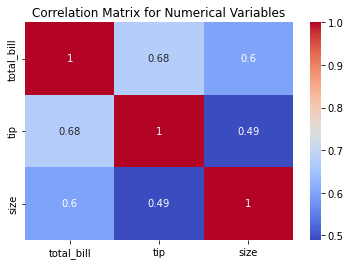

In [4]:
# Compute correlation matrix for numerical variables and display it using heatmap
corr_matrix = tips_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Numerical Variables")
plt.show()

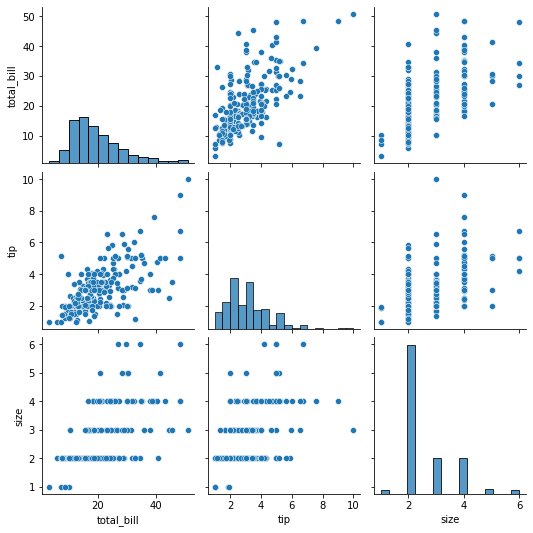

In [5]:
# Examine the pair plot of the numerical variables
sns.pairplot(tips_df)
plt.show()

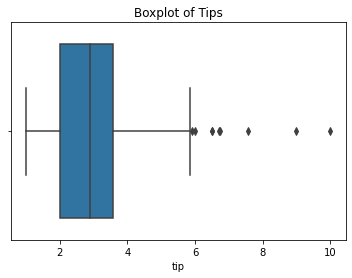

In [6]:
# Show a boxplot of tips and comment on the distribution of tips
sns.boxplot(x=tips_df['tip'])
plt.title("Boxplot of Tips")
plt.show()

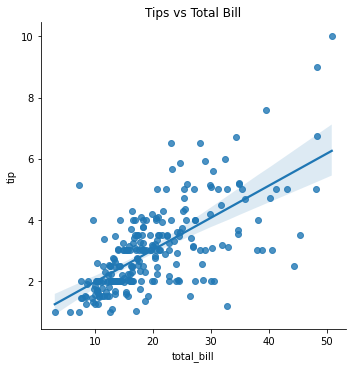

In [7]:
# Draw scatterplots of tips vs total_bill, tips vs size and overlay the linear fit lines
sns.lmplot(x='total_bill', y='tip', data=tips_df)
plt.title("Tips vs Total Bill")
plt.show()

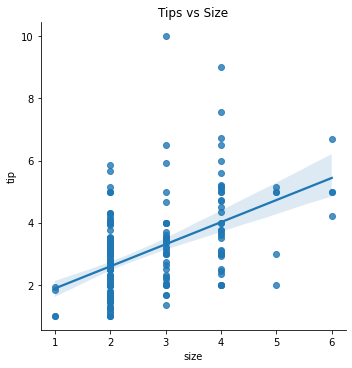

In [8]:
sns.lmplot(x='size', y='tip', data=tips_df)
plt.title("Tips vs Size")
plt.show()

In [9]:
# Examine the unique values and their frequency distributions for the categorical variables
for column in tips_df.select_dtypes(include=['object']):
    print("Frequency distribution for", column, ":\n", tips_df[column].value_counts(), "\n")

Frequency distribution for sex :
 Male      157
Female     87
Name: sex, dtype: int64 

Frequency distribution for smoker :
 No     151
Yes     93
Name: smoker, dtype: int64 

Frequency distribution for day :
 Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64 

Frequency distribution for time :
 Dinner    176
Lunch      68
Name: time, dtype: int64 



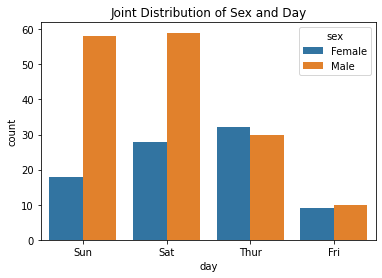

In [10]:
# Draw a bar graph for joint distribution of sex and day
sns.countplot(x='day', hue='sex', data=tips_df)
plt.title("Joint Distribution of Sex and Day")
plt.show()

Linear Regression Model: target – tips, predictors – all remaining variables

In [11]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import t

In [12]:
X = tips_df.drop(['tip'], axis = 1)
y = tips_df['tip']

In [13]:
# Split the data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [14]:
# Preprocess categorical and numerical features separately
categorical_cols = ['sex', 'smoker', 'day', 'time']
numerical_cols = ['total_bill', 'size']

In [15]:
preprocessor = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False), categorical_cols),
     ('poly', PolynomialFeatures(2,include_bias=False), numerical_cols)], remainder='passthrough')

In [16]:
# Create a pipeline consisting of the preprocessor and linear regression
pipeline = Pipeline([
        ('transformer', preprocessor),
        ('regression', LinearRegression()),
    ])

In [17]:
# Train the pipeline using the training data
pipeline.fit(X_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  ['sex', 'smoker', 'day',
                                                   'time']),
                                                 ('poly',
                                                  PolynomialFeatures(include_bias=False),
                                                  ['total_bill', 'size'])])),
                ('regression', LinearRegression())])

In [18]:
# Extract feature names and estimated coefficients
names=pipeline['transformer'].get_feature_names_out().tolist()

In [19]:
names=[name.split('__')[1] for name in names]

In [20]:
names.append('intercept')

In [21]:
model=pipeline['regression']

In [22]:
slopes=model.coef_.tolist()
slopes.append(model.intercept_)

In [23]:
# Print feature names and estimated coefficients
results=pd.DataFrame({'Feature': names, 'Coefficient': slopes})
results

,Feature,Coefficient
0,sex_Male,0.042880
1,smoker_Yes,-0.167348
2,day_Sat,-0.181773
3,day_Sun,-0.010841
4,day_Thur,-0.110318
5,time_Lunch,0.028253
6,total_bill,0.039528
7,size,0.019059
8,total_bill^2,0.000094
9,total_bill size,0.018154


In [24]:
# Which of the predictors have significant coefficients? Interpret them.
import statsmodels.api as sm
from statsmodels.formula.api import ols

# create OLS model
model = ols('tip ~ sex+ smoker +day+time+total_bill+ size', data=tips_df).fit()

# show regression results summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     26.06
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           1.20e-28
Time:                        01:21:49   Log-Likelihood:                -347.48
No. Observations:                 244   AIC:                             713.0
Df Residuals:                     235   BIC:                             744.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.8038      0.353      2.279

In [25]:
#evaluate model
from sklearn.metrics import r2_score

y_pred = pipeline.predict(X_test)
print('R^2 score:', r2_score(y_test, y_pred))

R^2 score: 0.34388142167515057


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


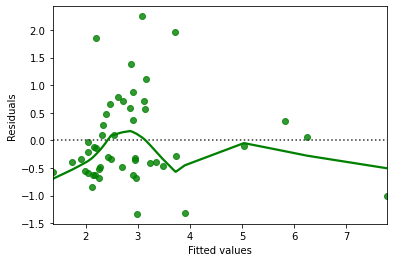

In [26]:
# Plot the residuals against fitted values
sns.residplot(y_pred, y_test, lowess=True, color="g")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

In [27]:
# Calculate t-statistics and p-values for the regression coefficient estimates
from scipy import stats
coef_table = pd.DataFrame({'coef': model.params,
                           'std err': model.bse,
                           't': model.tvalues,
                           'p-value': model.pvalues})
print(coef_table)


                   coef   std err         t       p-value
Intercept      0.803817  0.352702  2.279024  2.356339e-02
sex[T.Male]   -0.032441  0.141612 -0.229083  8.190036e-01
smoker[T.Yes] -0.086408  0.146587 -0.589468  5.561140e-01
day[T.Sat]    -0.121458  0.309742 -0.392127  6.953196e-01
day[T.Sun]    -0.025481  0.321298 -0.079305  9.368572e-01
day[T.Thur]   -0.162259  0.393405 -0.412448  6.803872e-01
time[T.Lunch]  0.068129  0.444617  0.153230  8.783485e-01
total_bill     0.094487  0.009601  9.840962  2.342526e-19
size           0.175992  0.089528  1.965782  5.050134e-02


2.	Regression Problem with polynomial features – Wage.csv


In [28]:
#Import Libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [29]:
# Load the Wage.csv file into a Pandas DataFrame
df_wage = pd.read_csv('Wage.csv')

In [30]:
# Use describe() function to print out the summary statistics of the data
print(df_wage.describe())

              year          age      logwage         wage
count  3000.000000  3000.000000  3000.000000  3000.000000
mean   2005.791000    42.414667     4.653905   111.703608
std       2.026167    11.542406     0.351753    41.728595
min    2003.000000    18.000000     3.000000    20.085537
25%    2004.000000    33.750000     4.447158    85.383940
50%    2006.000000    42.000000     4.653213   104.921507
75%    2008.000000    51.000000     4.857332   128.680488
max    2009.000000    80.000000     5.763128   318.342430


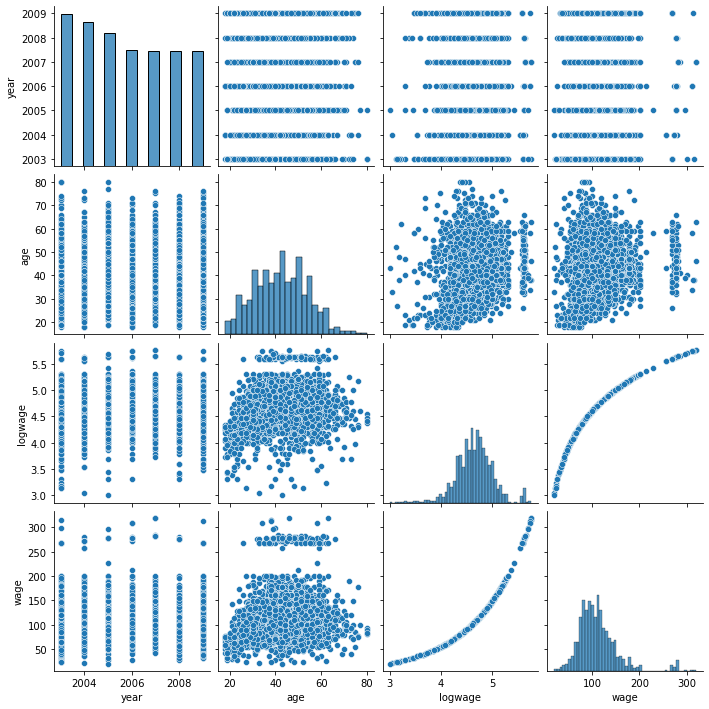

In [31]:
# Use seaborn to examine the pair plot of the numerical variables
sns.pairplot(df_wage.select_dtypes(include=[np.number]))

In [32]:
# Drop the 'year' and 'wage' columns from the DataFrame
df_wage = df_wage.drop(['year', 'wage'], axis=1)

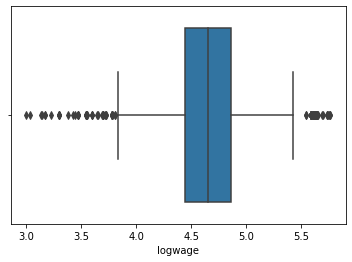

In [33]:
# Show a boxplot of logwage and comment on its distribution
sns.boxplot(x=df_wage['logwage'])
plt.show()

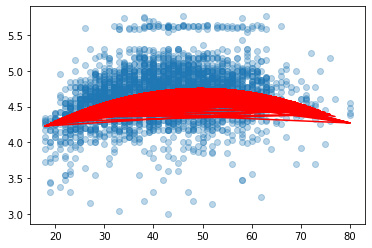

In [34]:
# Draw a scatter plot logwage vs age and overlay a second order polynomial fit line
x = df_wage[['age']]
y = df_wage['logwage']

poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)

plt.scatter(x, y, alpha=0.3)
plt.plot(x, model.predict(x_poly), color='red')
plt.show()

In [35]:
# Examine the unique values and their frequency distributions for the categorical variables
for col in df_wage.select_dtypes(include=['object']):
    print(df_wage[col].value_counts())

2. Married          2074
1. Never Married     648
4. Divorced          204
5. Separated          55
3. Widowed            19
Name: maritl, dtype: int64
1. White    2480
2. Black     293
3. Asian     190
4. Other      37
Name: race, dtype: int64
2. HS Grad            971
4. College Grad       685
3. Some College       650
5. Advanced Degree    426
1. < HS Grad          268
Name: education, dtype: int64
2. Middle Atlantic    3000
Name: region, dtype: int64
1. Industrial     1544
2. Information    1456
Name: jobclass, dtype: int64
2. >=Very Good    2142
1. <=Good          858
Name: health, dtype: int64
1. Yes    2083
2. No      917
Name: health_ins, dtype: int64


Estimate a linear regression model: target – logwage, predictors – all remaining variables. To this end:

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

In [37]:
X = df_wage.drop(['logwage'], axis = 1)
y = df_wage['logwage']

In [38]:
# a. Split the data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [39]:
# b. Preprocess the categorical and numerical features
categorical_cols = ['maritl', 'race', 'education', 'region', 'jobclass', 'health',
       'health_ins']
numerical_cols = ['age']

In [40]:
preprocessor = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False), categorical_cols),
     ('poly', PolynomialFeatures(2,include_bias=False), numerical_cols)], remainder='passthrough')

In [41]:
pipeline = Pipeline([
        ('transformer', preprocessor),
        ('regression', LinearRegression()),
    ])

In [42]:
pipeline.fit(X_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  ['maritl', 'race',
                                                   'education', 'region',
                                                   'jobclass', 'health',
                                                   'health_ins']),
                                                 ('poly',
                                                  PolynomialFeatures(include_bias=False),
                                                  ['age'])])),
                ('regression', LinearRegression())])

In [43]:
names=pipeline['transformer'].get_feature_names_out().tolist()

In [44]:
names=[name.split('__')[1] for name in names]

In [45]:
names.append('intercept')

In [46]:
model=pipeline['regression']

In [47]:
slopes=model.coef_.tolist()
slopes.append(model.intercept_)

In [48]:
results=pd.DataFrame({'Feature': names, 'Coefficient': slopes})
results

,Feature,Coefficient
0,maritl_2. Married,0.116941
1,maritl_3. Widowed,0.029274
2,maritl_4. Divorced,-0.008854
3,maritl_5. Separated,0.074775
4,race_2. Black,-0.042949
5,race_3. Asian,-0.015619
6,race_4. Other,-0.049321
7,education_2. HS Grad,0.074843
8,education_3. Some College,0.167777
9,education_4. College Grad,0.275356


In [49]:
# f. Which of the predictors have significant coefficients? Interpret them.
import statsmodels.api as sm
from statsmodels.formula.api import ols

# create OLS model
model_1 = ols('logwage ~ maritl+ race +education+region+jobclass+ health+health_ins+age', data=df_wage).fit()

# show regression results summary
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                logwage   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     116.8
Date:                Mon, 03 Apr 2023   Prob (F-statistic):          1.65e-285
Time:                        01:21:54   Log-Likelihood:                -428.88
No. Observations:                3000   AIC:                             889.8
Df Residuals:                    2984   BIC:                             985.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [50]:
#evaluate model
from sklearn.metrics import r2_score

y_pred = pipeline.predict(X_test)
print('R^2 score:', r2_score(y_test, y_pred))

R^2 score: 0.42037899027409475


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


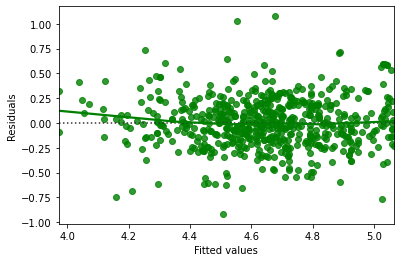

In [51]:
# Plot the residuals against fitted values
sns.residplot(y_pred, y_test, lowess=True, color="g")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

In [52]:
# Calculate t-statistics and p-values for the regression coefficient estimates
from scipy import stats
coef_table = pd.DataFrame({'coef': model_1.params,
                           'std err': model_1.bse,
                           't': model_1.tvalues,
                           'p-value': model_1.pvalues})
print(coef_table)

                                     coef   std err           t       p-value
Intercept                        4.240086  0.029074  145.839733  0.000000e+00
maritl[T.2. Married]             0.162006  0.014152   11.447780  9.975656e-30
maritl[T.3. Widowed]             0.037297  0.065860    0.566305  5.712292e-01
maritl[T.4. Divorced]            0.042927  0.023754    1.807133  7.084223e-02
maritl[T.5. Separated]           0.124031  0.039876    3.110379  1.886116e-03
race[T.2. Black]                -0.038251  0.017659   -2.166159  3.037798e-02
race[T.3. Asian]                -0.018050  0.021421   -0.842614  3.995119e-01
race[T.4. Other]                -0.058450  0.046648   -1.253020  2.102965e-01
education[T.2. HS Grad]          0.082946  0.019505    4.252564  2.178282e-05
education[T.3. Some College]     0.182595  0.020746    8.801489  2.241559e-18
education[T.4. College Grad]     0.283561  0.020977   13.517734  1.861718e-40
education[T.5. Advanced Degree]  0.435549  0.023139   18.822837 

3.	Classification Problem – Advertising.csv

In [53]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve

In [54]:
# Load the data
df_adv = pd.read_csv('Advertising.csv')


Explorative Data Analysis (EDA)

In [55]:
df_adv.shape

(1000, 10)

In [56]:
df_adv.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [57]:
df_adv.dtypes

Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Male                          int64
Country                      object
Timestamp                    object
Clicked on Ad                 int64
dtype: object

In [58]:
print(df_adv.isnull().sum())

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64


In [59]:
df_adv.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


<Figure size 720x432 with 0 Axes>

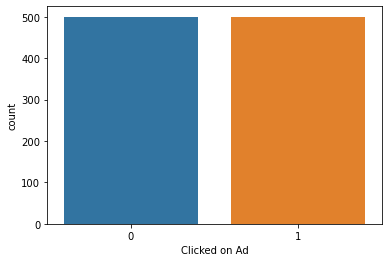

<Figure size 720x432 with 0 Axes>

In [60]:
sns.countplot(x='Clicked on Ad', data=df_adv)
plt.figure(figsize=(10,6))

<AxesSubplot:>

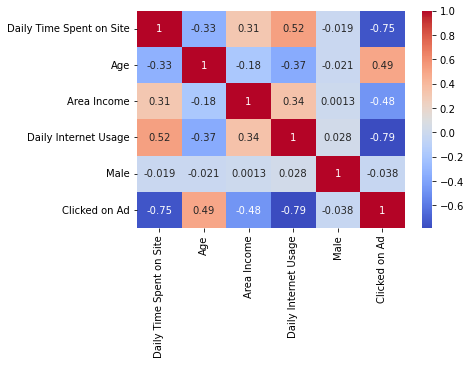

In [61]:
sns.heatmap(df_adv.corr(), annot=True, cmap='coolwarm')

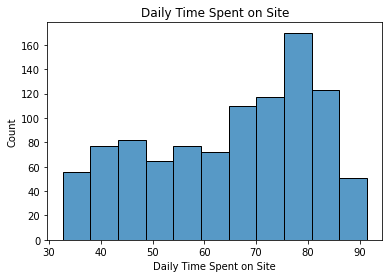

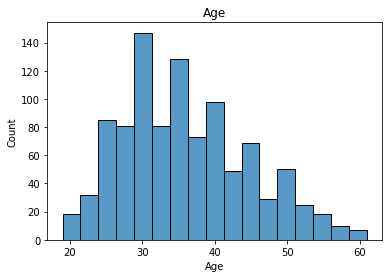

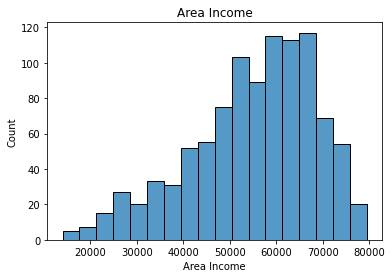

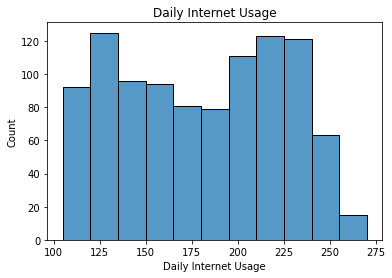

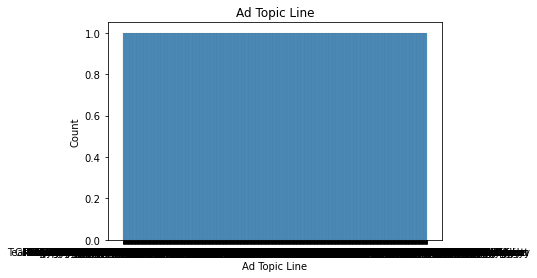

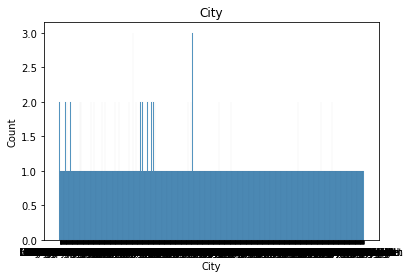

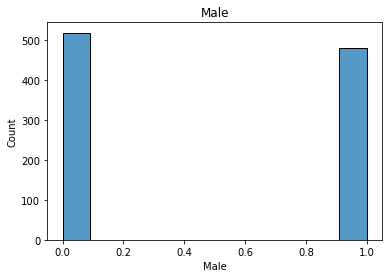

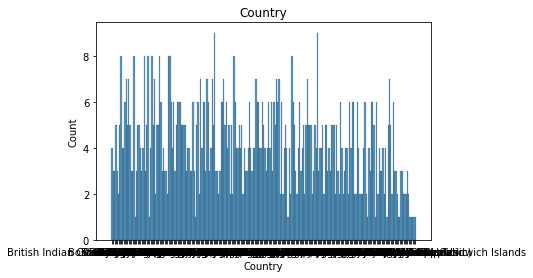

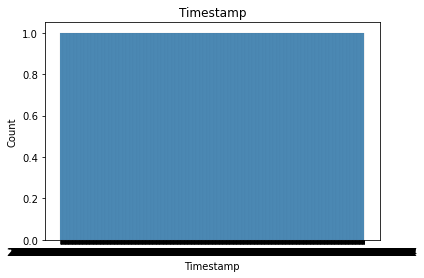

In [62]:
#Check the distribution of each feature
for col in df_adv.columns[:-1]:
    sns.histplot(df_adv[col])
    plt.title(col)
    plt.show()

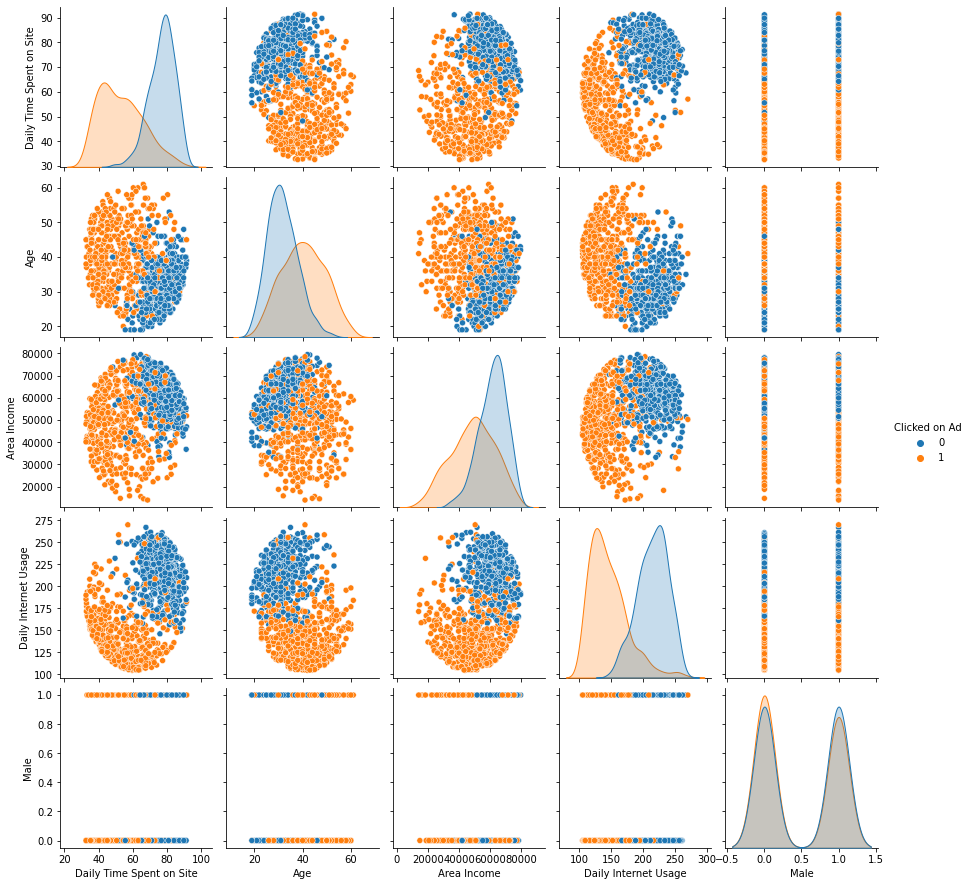

In [63]:
#Check the pairwise relationships between the features
sns.pairplot(df_adv, hue='Clicked on Ad')

In [64]:
# Split data into train and test sets and preprocess data
X = df_adv[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
y = df_adv['Clicked on Ad']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
from sklearn.preprocessing import LabelEncoder
# Encode the 'diagnosis' column as binary
le = LabelEncoder()
df_adv['Clicked on Ad'] = le.fit_transform(df_adv['Clicked on Ad'])

In [67]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Standardize the numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [68]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from  sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from  sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

In [69]:
# To save time and space, we will train and test all models jointly. Define a classifier dictionary:
clf_dict = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000, random_state=1),
    'Naive Bayes': GaussianNB(), 
    'LDA': LDA(),
    'QDA': QDA()
}

In [70]:
def train_predict(X, y, dictionary):
    '''
    Trains a dictionary of models, get predicted probabilities, & populate a dataframe with probabilities
    '''  
    # Empty dictionary with keys according to the clf models
    adf = pd.DataFrame(columns=dictionary.keys())
    
    for key, clf in dictionary.items():
        clf.fit(X, y)
        
        if hasattr(clf, "predict_proba"):
            prob_pos = clf.predict_proba(X)[:, 1] # The predicted probabilities are in a Numpy array
        else:
            prob_pos = clf.decision_function(X)
            prob_pos = (prob_pos - prob_pos.min())/(prob_pos.max() - prob_pos.min())
            
        # Appending Numpy array of probabilities to Pandas Dataframe
        adf[key] = pd.Series(prob_pos).transpose()
        
    return adf

In [71]:
train_probabilities = train_predict(X_train, y_train, clf_dict)

In [72]:
# The classifier dictionary now stores fitted models, one can obtain coeff estimates, if exist

In [73]:
clf_dict['Logistic Regression'].coef_

array([[-5.53747212e-02,  2.61911536e-01, -1.53062998e-05,
        -2.68098772e-02,  1.79562009e-03]])

In [74]:
clf_dict['LDA'].coef_

array([[-3.02027387e-01,  2.16407903e-01, -1.65236500e-04,
        -1.40031676e-01, -9.63639869e-01]])

In [75]:
def predict(X, fitted_dict):
    '''
    Gets predicted probabilities for a dictionary of fitted classfiers
    '''  
    # Empty dictionary with keys according to the clf models
    df = pd.DataFrame(columns=fitted_dict.keys())
    
    for key, clf in fitted_dict.items():        
        if hasattr(clf, "predict_proba"):
            prob_pos = clf.predict_proba(X)[:, 1] # The predicted probabilities are in a Numpy array
        else:
            prob_pos = clf.decision_function(X)
            prob_pos = (prob_pos - prob_pos.min())/(prob_pos.max() - prob_pos.min())
            
        # Appending Numpy array of probabilities to Pandas Dataframe
        df[key] = pd.Series(prob_pos).transpose()
        
    return df

In [76]:
test_probabilities = predict(X_test, clf_dict)

In [77]:
test_probabilities.head()

,Logistic Regression,Naive Bayes,LDA,QDA
0,0.507911,0.999511,0.998890,1.00000
1,0.996854,0.999996,0.999995,1.00000
2,0.951323,0.999999,0.999989,1.00000
3,0.990033,0.999989,0.999590,1.00000
4,0.033981,0.000682,0.000016,0.00034


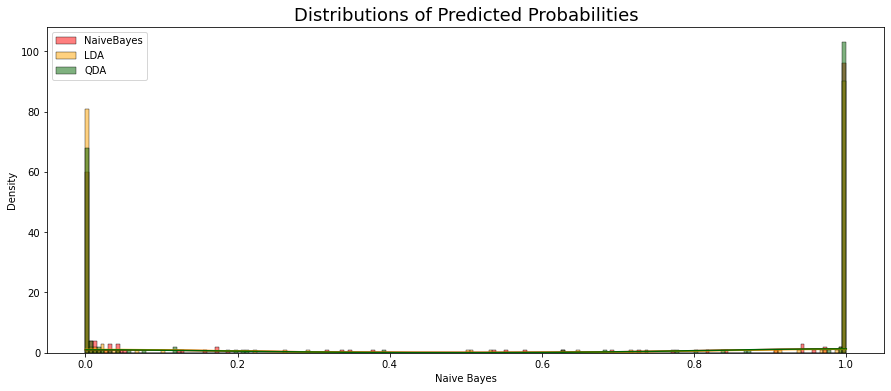

In [78]:
fig, ax = plt.subplots(figsize=(15,6))

# sns.histplot(test_probabilities['Logistic Regression'], bins=200, kde=False, ax=ax, stat="density",
#              color='dodgerblue', label='Logistic Regression')
sns.histplot(test_probabilities['Naive Bayes'], bins=200, kde=True, ax=ax, stat="density",
             color='red', label='NaiveBayes')
sns.histplot(test_probabilities['LDA'], bins=200, kde=True, ax=ax,  stat="density",
             color='orange', label='LDA')
sns.histplot(test_probabilities['QDA'], bins=200, kde=True, ax=ax,  stat="density",
             color='darkgreen', label='QDA')

ax.legend(loc="upper right", fontsize=12)
plt.title('Distributions of Predicted Probabilities', fontsize=18)
plt.legend()
plt.show()

In [79]:
def f1_threshold(precision, recall, thresholds):
    numer = 2 * recall * precision
    denom = recall + precision
    f1_scores = np.divide(numer, denom, out=np.zeros_like(denom), where=(denom!=0))
    max_f1 = np.max(f1_scores)
    thresh_id=np.argmax(f1_scores)
    max_f1_thresh = thresholds[thresh_id]
#     print("Maximum F1 score: {:0.4f}".format(max_f1))
#     print("Optimal probability threshold: {:0.4f}".format(max_f1_thresh))
    return max_f1_thresh, max_f1, thresh_id

In [80]:
def optimal_f1_score(X,y,fitted_dict):
    K=len(fitted_dict.keys())
    fig, ax = plt.subplots(1, K, figsize=(16,4), sharey=True)
    fig.suptitle("Precision-Recall Rates versus Threshold", fontsize=16)
    i=0     
    thresh=[]
    score=[]
    for key, clf in fitted_dict.items():
        pred_probs=clf.predict_proba(X)[:,1]
        precision, recall, thresholds = precision_recall_curve(y, pred_probs, pos_label=1)
        max_f1_thresh, max_f1, thresh_id=f1_threshold(precision, recall, thresholds)
        thresh.append(max_f1_thresh)
        score.append(max_f1)
        thresholds = np.append(thresholds, 1)
        ax[i].plot(thresholds, precision, color=sns.color_palette()[0]) 
        ax[i].plot(thresholds, recall, color=sns.color_palette()[1])
        ax[i].scatter(max_f1_thresh, precision[thresh_id], c='k')
        ax[i].scatter(max_f1_thresh, recall[thresh_id], c='k')
        ax[i].text(0.5, 0.5, key, fontsize=14, verticalalignment='top')        
        ax[i].set_xlabel('Probability Threshold')   
        i+=1
    ax[0].legend(('Precision', 'Recall'), fontsize=14)
    ax[0].set_ylabel('%')
    plt.show()    
    thresh_df=pd.DataFrame({'Model':fitted_dict.keys(), 'Threshold': thresh, 'F1-score': score})
    return thresh_df

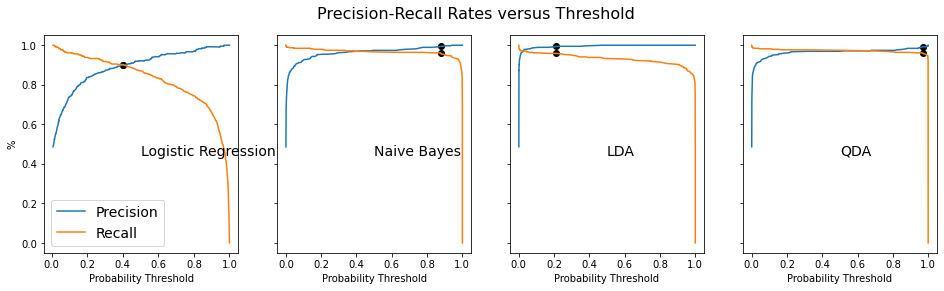

In [81]:
f1_thresholds = optimal_f1_score(X_train,y_train,clf_dict)

In [82]:
f1_thresholds

,Model,Threshold,F1-score
0,Logistic Regression,0.399532,0.901155
1,Naive Bayes,0.876266,0.977778
2,LDA,0.207982,0.976440
3,QDA,0.968439,0.976501


In [83]:
def roc_threshold(fpr, tpr, thresholds):
    g_means = np.sqrt(tpr*(1-fpr))
    max_g = np.max(g_means)
    thresh_id=np.argmax(g_means)
    max_thresh = thresholds[thresh_id]
#     print("Maximum F1 score: {:0.4f}".format(max_f1))
#     print("Optimal probability threshold: {:0.4f}".format(max_f1_thresh))
    return max_thresh, max_g, thresh_id

In [84]:
def optimal_roc_auc_score(X,y,fitted_dict):
    K=len(fitted_dict.keys())
    fig, ax = plt.subplots(1, K, figsize=(16,4), sharey=True)
    fig.suptitle("ROC Plots and Optimal Thresholds", fontsize=16)
    i=0     
    thresh=[]
    score=[]
    for key, clf in fitted_dict.items():
        pred_probs=clf.predict_proba(X)[:,1]
        fpr, tpr, thresholds = roc_curve(y, pred_probs)
        max_thresh, max_g, thresh_id=roc_threshold(fpr, tpr, thresholds)
        thresh.append(max_thresh)
        score.append(max_g)
        thresholds = np.append(thresholds, 1)
        ax[i].plot(fpr, tpr, color='blue') 
        ax[i].plot([0,1],[0,1], linestyle='dashed', c='red')
        ax[i].scatter(fpr[thresh_id], tpr[thresh_id], c='k')
        ax[i].text(0.2, 0.5, key, fontsize=14, verticalalignment='top')                
        ax[i].set_xlabel('False Positive Rate')   
        i+=1    
    ax[0].set_ylabel('True Positive Rate')
    plt.show()    
    thresh_df=pd.DataFrame({'Model':fitted_dict.keys(), 'Threshold': thresh, 'Gmeans-score': score})
    return thresh_df

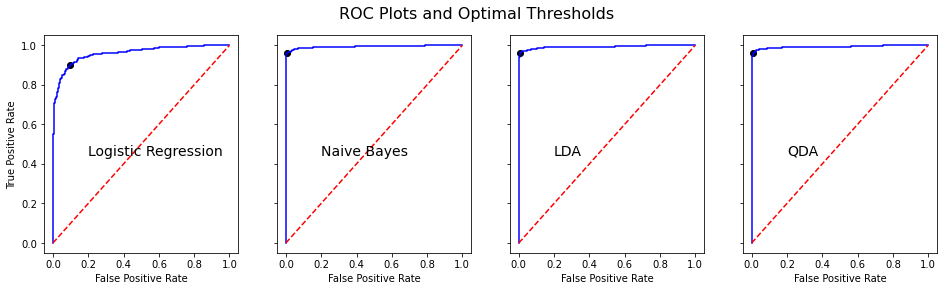

In [85]:
roc_thresholds=optimal_roc_auc_score(X_train,y_train,clf_dict)

In [86]:
roc_thresholds

,Model,Threshold,Gmeans-score
0,Logistic Regression,0.399532,0.903710
1,Naive Bayes,0.876266,0.978142
2,LDA,0.207982,0.976833
3,QDA,0.968439,0.976945


In [87]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [88]:
test_probs_predicted = predict(X_test, clf_dict)
test_probs_predicted.head()

,Logistic Regression,Naive Bayes,LDA,QDA
0,0.507911,0.999511,0.998890,1.00000
1,0.996854,0.999996,0.999995,1.00000
2,0.951323,0.999999,0.999989,1.00000
3,0.990033,0.999989,0.999590,1.00000
4,0.033981,0.000682,0.000016,0.00034


In [89]:
def test_scores(y_test, test_probs_predicted, thresholds_df):
    '''
    Loops through dictionaries of predicted probabilities and scores them against the actual class observations
    '''
    test_f1_scores = []
    test_recall_scores = []
    test_pre_scores = []
    test_roc_auc_scores = []
    test_acc_scores = []   
    
    models=thresholds_df['Model'].tolist()
    thresholds=thresholds_df['Threshold'].tolist()

    for model, threshold in zip(models, thresholds):
        prob_list = test_probs_predicted[model].tolist()
        test_class = [1 if i > threshold else 0 for i in prob_list]
        
        test_f1 = f1_score(y_test,test_class, average='binary')
        test_f1_scores.append(round(test_f1,4))
        
        test_recall = recall_score(y_test, test_class)
        test_recall_scores.append(round(test_recall,4))
        
        test_pre = precision_score(y_test,  test_class)
        test_pre_scores.append(round(test_pre,4))   
        
        test_roc_auc =roc_auc_score(y_test,  test_class)
        test_roc_auc_scores.append(round(test_roc_auc,4))
                
        test_acc = accuracy_score(y_test,  test_class)
        test_acc_scores.append(round(test_acc,4))
        
    # Create results dataframe
    results = pd.DataFrame({'Model': models,                            
                            'Test ROC-AUC': test_roc_auc_scores,
                            'Test F1': test_f1_scores,
                            "Test Recall" : test_recall_scores,
                            'Test Precision': test_pre_scores,
                            'Test Accuracy': test_acc_scores,
                            })

    return results

In [90]:
results_f1=test_scores(y_test, test_probs_predicted, f1_thresholds)
results_f1

,Model,Test ROC-AUC,Test F1,Test Recall,Test Precision,Test Accuracy
0,Logistic Regression,0.9032,0.9065,0.8739,0.9417,0.900
1,Naive Bayes,0.9437,0.9439,0.9099,0.9806,0.940
2,LDA,0.9370,0.9401,0.9189,0.9623,0.935
3,QDA,0.9572,0.9585,0.9369,0.9811,0.955


In [91]:
results_roc=test_scores(y_test, test_probs_predicted, roc_thresholds)
results_roc

,Model,Test ROC-AUC,Test F1,Test Recall,Test Precision,Test Accuracy
0,Logistic Regression,0.9032,0.9065,0.8739,0.9417,0.900
1,Naive Bayes,0.9437,0.9439,0.9099,0.9806,0.940
2,LDA,0.9370,0.9401,0.9189,0.9623,0.935
3,QDA,0.9572,0.9585,0.9369,0.9811,0.955


In [92]:
def confusion_matrices(y_test, test_probs_predicted, thresholds_df):
    '''
    Loops through dictionaries of predicted probabilities and produces confusion matrices
    '''    
    models=thresholds_df['Model'].tolist()
    thresholds=thresholds_df['Threshold'].tolist()
    K=len(models)
    fig, ax = plt.subplots(1, K, figsize=(16,4), sharey=True)
    fig.suptitle("Confusion Matrices", fontsize=16)
    i=0     
    for model, threshold in zip(models, thresholds):
        prob_list = test_probs_predicted[model].tolist()
        test_class = [1 if i > threshold else 0 for i in prob_list]
        sns.heatmap(data=confusion_matrix(y_test ,test_class, normalize='true'), ax=ax[i], annot=True)
        ax[i].set_xlabel(model)
        i+=1
    plt.show()

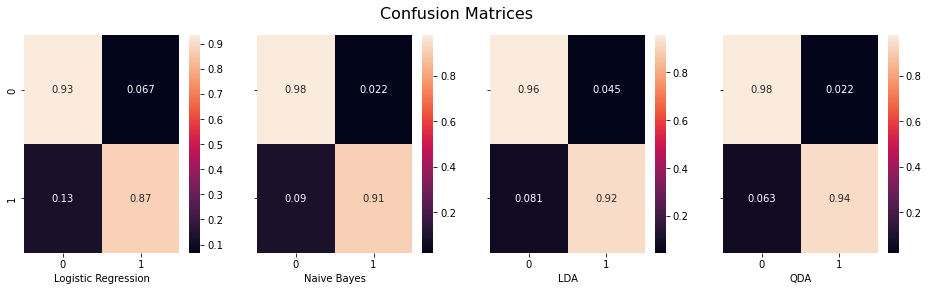

In [93]:
confusion_matrices(y_test, test_probs_predicted, f1_thresholds)

In [94]:
#QDA is the best performing model using roc_auc, gini, recall, precision, accuracy and f1score.